In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
dirname = "../build/benchmarks/data/Lx0500000_Ly0500000_lx0150000_ly0450000_dt0001000/"
a = np.fromfile(dirname + "position/position000000.dat")
b = np.fromfile(dirname + "position/position000250.dat")
c = np.fromfile(dirname + "position/position000500.dat")
pressure = np.fromfile(dirname + "pressure/pressure000500.dat" )

type = np.fromfile(dirname + "type/type000000.dat", dtype=np.int32)

In [67]:
N = a.size//2
a = a.reshape(N,2)
b = b.reshape(N,2)
c = c.reshape(N,2)

(-0.12, 0.6)

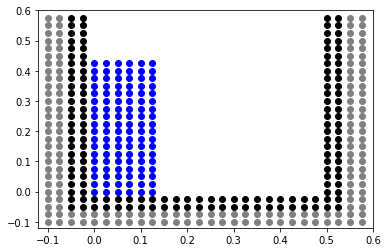

In [68]:
for i in range(N):
    if(type[i] == 0):
        plt.plot(a[i][0], a[i][1], "o", c="blue")
    elif(type[i] == 1):
        plt.plot(a[i][0],a[i][1], "o", c="black")
    elif(type[i] ==2):
        plt.plot(a[i][0],a[i][1], "o", c="gray")
plt.xlim(-0.12,0.6)
plt.ylim(-0.12,0.6)

(-0.12, 0.6)

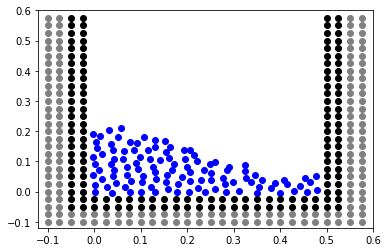

In [69]:
for i in range(N):
    if(type[i] == 0):
        plt.plot(b[i][0], b[i][1], "o", c="blue")
    elif(type[i] == 1):
        plt.plot(b[i][0],b[i][1], "o", c="black")
    elif(type[i] ==2):
        plt.plot(b[i][0],b[i][1], "o", c="gray")
plt.xlim(-0.12,0.6)
plt.ylim(-0.12,0.6)

(-0.12, 0.6)

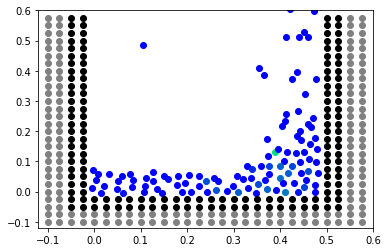

In [77]:
normalized_pressure = pressure/np.max(pressure)
cmap = plt.get_cmap("winter")
for i in range(N):
    if(type[i] == 0):
        plt.plot(c[i][0], c[i][1], "o", c=cmap(normalized_pressure[i]))
    elif(type[i] == 1):
        plt.plot(c[i][0],c[i][1], "o", c="black")
    elif(type[i] ==2):
        plt.plot(c[i][0],c[i][1], "o", c="gray")
plt.xlim(-0.12,0.6)
plt.ylim(-0.12,0.6)

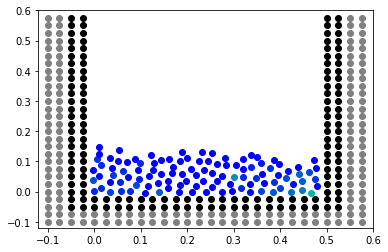

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
TIME=200
dirname = "../build/benchmarks/data/Lx0500000_Ly0500000_lx0150000_ly0450000_dt0001000/"
a = np.array([np.fromfile(dirname + f"position/position{10*i:06}.dat").reshape(N,2) for i in range(TIME)])
pressure = np.array([np.fromfile(dirname + f"pressure/pressure{10*i:06}.dat") for i in range(TIME)])
normalized_pressure = pressure/5000.0
truncated_pressure = np.where(normalized_pressure <= 5000.0, normalized_pressure, 1)
cmap = plt.get_cmap("winter")
ims = []
for data, p in zip(a,truncated_pressure):
    im = []
    plt.xlim(-0.12,0.6)
    plt.ylim(-0.12,0.6)
    for i in range(N):
        if(type[i] == 0):
            line,=plt.plot(data[i][0], data[i][1], "o", c=cmap(p[i]))
            im.append(line)
        elif(type[i] == 1):
            line,=plt.plot(data[i][0],data[i][1], "o", c="black")
            im.append(line)
        elif(type[i] ==2):
            line,=plt.plot(data[i][0],data[i][1], "o", c="gray")
            im.append(line)
    ims.append(im)

ani = animation.ArtistAnimation(fig, ims)
ani.save('anim.gif', writer="imagemagick",fps=10)
ani.save('anim.mp4', writer="ffmpeg", fps=10)

In [115]:
from IPython.display import Video
Video("./anim.mp4")


In [81]:
max_pressure = 0
for i in range(50):
    dirname = "../build/benchmarks/data/Lx0500000_Ly0500000_lx0150000_ly0450000_dt0001000/"
    pressure = np.fromfile(dirname + f"pressure/pressure{10*i:06}.dat")
    local_max_pressure = np.max(pressure)
    if max_pressure < local_max_pressure:
        max_pressure = local_max_pressure

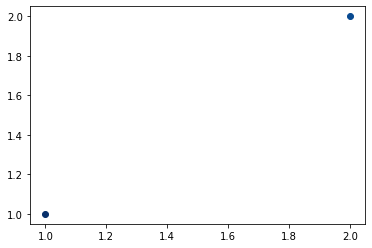

In [103]:
cmap = plt.get_cmap("Blues")
plt.plot(1,1, "o",c=cmap(1.9))
plt.plot(2,2, "o",c=cmap(0.9))

(array([  0,   0,   0, ..., 199, 199, 199]),
 array([105, 133, 155, ..., 333, 334, 335]))